In [50]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

In [52]:
from sklearn.datasets import load_boston

In [53]:
boston = load_boston()

In [54]:
print(boston.DESCR)
# MEDV is our target value to guess

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

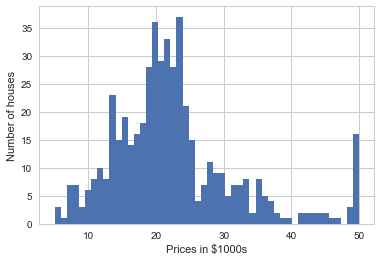

In [55]:
plt.hist(boston.target ,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

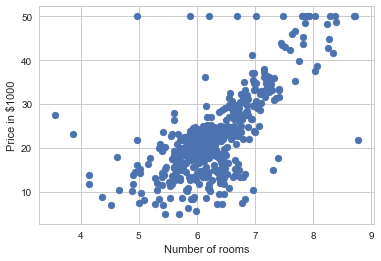

In [56]:
# relationsships of one feature and the target value
## choose RM, the number of rooms per dwelling, and price
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in $1000')
plt.xlabel('Number of rooms')

    1.) Use pandas to transform the boston dataset into a DataFrame: 
    2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [57]:
boston_df= DataFrame(boston.data)
boston_df.columns= boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
boston_df['Price']= boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


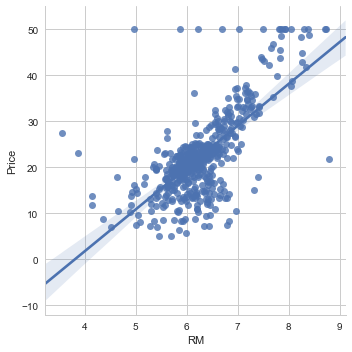

In [59]:
sns.lmplot('RM','Price',data=boston_df)

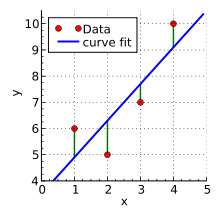

In [60]:
# math behind LSM, see lecture note at https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb
from IPython.display import Image
Image('http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png')

In [61]:
X= boston_df.RM
X.shape

(506,)

In [62]:
# X needs an attribute
X= np.vstack(X) # make an array 2-dim
X.shape

(506, 1)

In [63]:
Y=boston_df.Price

Single variable linear regression equation is:
\begin{equation}
    y=mx + b
\end{equation}

in matrices:
\begin{equation}
    y=\left[
          \begin{array}{cc}
             A&p
          \end{array}
      \right]
\end{equation}

where,
\begin{equation}
    A= \left[
            \begin{array}{cc}
                x&1
            \end{array}
        \right]
\end{equation}

\begin{equation}
    p=\left[
            \begin{array}{c}
                m\\
                b
            \end{array}
        \right]
\end{equation}

So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [64]:
# create the X array in the form [X 1] 
X = np.array([[value,1] for value in X])

In [65]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [67]:
m,b = np.linalg.lstsq(X,Y)[0] # linear algebra, x vector is stored in 0th index

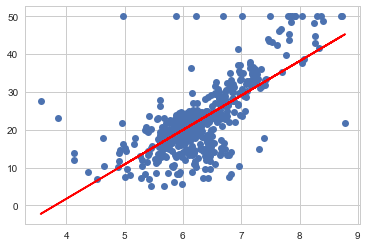

In [71]:
plt.plot(boston_df.RM, boston_df.Price,'o')
x =boston_df.RM
plt.plot(x,m*x+b,color='r',label='Best Fit Line')

In [72]:
# getting the error
result =np.linalg.lstsq(X,Y) 
error_total = result[1] # residual is stored in 1st index
rmse=np.sqrt(error_total/len(X))

print('The root mean square error was %.2f' %rmse)

The root mean square error was 6.60


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time

In [73]:
# multivariate regression
import sklearn
from sklearn.linear_model import LinearRegression

In [74]:
lreg=LinearRegression()

lreg.fit() which fits a linear model  
lreg.predict() which is used to predict Y using the linear model with estimated coefficients  
lreg.score() which returns the coefficient of determination (R^2).

In [75]:
X_multi=boston_df.drop('Price',axis=1)
Y_target=boston_df.Price

In [76]:
lreg.fit(X=X_multi,y=Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
print('The estimated intecept coefficient is %.2f' % lreg.intercept_)
print('The number of coefficients used was %d' % len(lreg.coef_))  # number of variances

The estimated intecept coefficient is 36.49
The number of coefficients used was 13


In [81]:
coef_df = DataFrame(boston_df.columns)
coef_df.columns=['Features']
coef_df['Coefficient Estimate'] =Series(lreg.coef_)
coef_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [102]:
# using training and validation in simple linear regression model
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [103]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [104]:
lreg= LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [106]:
print('Fit of a model X_train, and culculate the mean square error with Y_training: %.2f' %np.mean((Y_train-pred_train)**2) )
print('Fit of a model X_train, and culculate the mean square error with X_test and Y_test: %.2f' %np.mean((Y_test-pred_test)**2))

Fit of a model X_train, and culculate the mean square error with Y_training: 42.33
Fit of a model X_train, and culculate the mean square error with X_test and Y_test: 47.56


The question is, is this number good or not good?

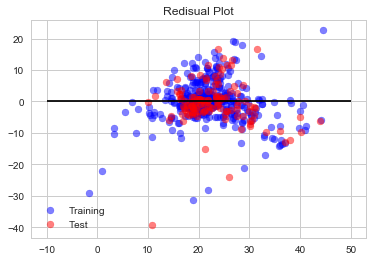

In [108]:
# Residual Plots
train= plt.scatter(pred_train, (pred_train-Y_train), c='b', alpha=0.5)
test= plt.scatter(pred_test, (pred_test-Y_test), c='r',alpha=0.5)
plt.hlines(y=0, xmin=-10, xmax=50)
plt.legend((train,test),('Training', 'Test'), loc='lower left')   ## (train,test) is defined in the first two lines
plt.title('Redisual Plot')